In [1]:
%pylab inline
import pandas as pd
import pickle

Populating the interactive namespace from numpy and matplotlib


In [2]:
predictions = dict()
'''
for dset in ['x-fn']: #06
    topX = [i.strip() for i in open("/home/vxue/data/sort_specificity/design_z/specificity/trial_5/"+dset+"_poly.csv",'r').readlines()]
    predictions[dset+'_poly']=topX

for dset in ['f-nx','n-xf']: #06
    topX = [i.strip() for i in open("/home/vxue/data/sort_specificity/design_z/specificity/trial_3/"+dset+"_poly.csv",'r').readlines()]
    predictions[dset+'_poly']=topX


'''
for dset in ['nx-f','xf-n']: #06
    topX = [i.strip() for i in open("/home/vxue/data/sort_specificity/design_y/specificity/trial3/"+dset+"_poly.csv",'r').readlines()]
    predictions[dset+'_poly']=topX[0:200]

    
for dset in ['fn-x']: #06
    topX = [i.strip() for i in open("/home/vxue/data/sort_specificity/design_y/specificity/trial5/"+dset+"_poly.csv",'r').readlines()]
    predictions[dset+'_poly']=topX[0:200]


In [3]:
predictions.keys()

dict_keys(['nx-f_poly', 'xf-n_poly', 'fn-x_poly'])

In [4]:
#Define Dummy Variable Encoding
aminoAcidIndex = 'ACEDGFIHKMLNQPSRTWVY'

def getAAVector(letter):
    vector = np.zeros(20);
    vector[aminoAcidIndex.index(letter)]=1
    return  vector

def encodeWithDummyVariables(sequence):
    newArray=[]
    for aa in sequence:
        newArray.append(getAAVector(aa))
    return np.array(newArray).ravel()

In [5]:
predictionSource = []
allSeqs = []

for each in ['fn-x_poly', 'nx-f_poly', 'xf-n_poly']:
    allSeqs.extend(predictions[each])
    predictionSource.extend([each]*len(predictions[each]))

In [6]:
predictionDF = pd.DataFrame({'seq':allSeqs,'source':predictionSource})

In [7]:
predictionDF[predictionDF['seq'].str.contains('set')]

,seq,source


In [8]:
cleanPrediction = predictionDF[~predictionDF['seq'].str.contains('set')].copy()

In [9]:

myMatrix = np.array([encodeWithDummyVariables(k) for k in cleanPrediction.seq])


for dset in ['s','t','m','x','f','n']:

    polyModel = pickle.load(open("/home/vxue/data/sort_specificity/rmse_doubleSet/ncv_y/modelpolyall_"+dset+".pickle",'rb'))
    linearModel = pickle.load(open("/home/vxue/data/sort_specificity/rmse_doubleSet/ncv_y/modellinearall_"+dset+".pickle",'rb'))


    cleanPrediction[dset+'_poly'] = polyModel.predict(myMatrix)
    cleanPrediction[dset+'_linear'] = linearModel.predict(myMatrix)

    

In [10]:
for dset in ['m','x','f']:

    polyModel = pickle.load(open("/home/vxue/data/sort_specificity/rmse_doubleSet/ncv_y/modelpolycomboall_"+dset+".pickle",'rb'))
    linearModel = pickle.load(open("/home/vxue/data/sort_specificity/rmse_doubleSet/ncv_y/modellinearcomboall_"+dset+".pickle",'rb'))


    cleanPrediction[dset+'_combo_poly'] = polyModel.predict(myMatrix)
    cleanPrediction[dset+'_combo_linear'] = linearModel.predict(myMatrix)


In [11]:
cleanPrediction.head()

,seq,source,s_poly,s_linear,t_poly,t_linear,m_poly,m_linear,x_poly,x_linear,f_poly,f_linear,n_poly,n_linear,m_combo_poly,m_combo_linear,x_combo_poly,x_combo_linear,f_combo_poly,f_combo_linear
0,GRRIDQIAQILRRIGDMIEKYI,fn-x_poly,-9.183067,-9.841554,-11.203086,-10.938107,-11.898314,-11.685004,-9.070134,-9.269423,-12.010572,-11.555997,-11.869353,-11.935260,-11.846518,-11.739533,-9.045725,-9.434989,-11.677176,-11.149620
1,GRAIDQIAQILRRIGDMIEKYI,fn-x_poly,-9.232060,-9.722697,-11.241881,-10.988410,-12.155185,-11.552626,-9.116706,-9.227031,-12.024109,-11.542880,-12.171835,-12.064238,-12.256540,-11.693494,-9.154716,-9.332323,-11.756612,-11.191615
2,GRRIDQIAQILRRIGDEIEKYI,fn-x_poly,-9.458415,-9.941670,-11.353800,-10.979817,-12.185135,-11.730830,-9.206533,-9.418901,-12.108079,-11.587496,-12.065904,-11.929506,-12.101783,-11.743944,-9.420165,-9.544247,-11.769117,-11.191685
3,GRRIDQIAQILRRIGDMITKYI,fn-x_poly,-9.080645,-9.753434,-10.994387,-10.761484,-11.861819,-11.708512,-8.932589,-9.129909,-11.820305,-11.259298,-11.683512,-11.978248,-11.687691,-11.822835,-8.828601,-9.275297,-11.377385,-10.941765
4,GRAIVQIAQILRRIGDMIEKYI,fn-x_poly,-9.190828,-9.732317,-11.168063,-11.051789,-11.964843,-11.259552,-9.107231,-9.261271,-11.987355,-11.489522,-11.883996,-11.737406,-11.951162,-11.385274,-9.104187,-9.401353,-11.734920,-11.263933


In [12]:
import re

def getColor(source):
    myIndex = ['n','f','x']
    myRGB = [0,0,0,0.2]
    
    if(bool(re.findall('-',source))):
        target = re.split('-',source)[0]
        for i in target:
            myRGB[myIndex.index(i)]=1
            
    else:
        myRGB[myIndex.index(source[0])]=1
        
    if(bool(re.findall('poly',source))):
        myRGB[3]=1
        
    return matplotlib.colors.colorConverter.to_rgba(myRGB)

In [13]:
cleanPrediction['color'] = cleanPrediction.apply(lambda x: getColor(x['source']),axis=1)

In [14]:
cleanPrediction['colorhex'] = cleanPrediction.apply(lambda x : matplotlib.colors.rgb2hex(x['color']),axis=1)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c2/AdditiveColor.svg/1024px-AdditiveColor.svg.png", width=400>

In [15]:
def plotDotted(ax):
    ax.plot([-16,-4],[-16,-4])


    ax.plot([-16-tenFold,-4-tenFold],[-16,-4],color='grey',alpha=0.3,linestyle='--')
    ax.plot([-16+tenFold,-4+tenFold],[-16,-4],color='grey',alpha=0.3,linestyle='--')

    ax.plot([-16-hundredFold,-4-hundredFold],[-16,-4],color='grey',alpha=0.3,linestyle='--')
    ax.plot([-16+hundredFold,-4+hundredFold],[-16,-4],color='grey',alpha=0.3,linestyle='--')

    ax.plot([-16-thouFold,-4-thouFold],[-16,-4],color='grey',alpha=0.3,linestyle='--')
    ax.plot([-16+thouFold,-4+thouFold],[-16,-4],color='grey',alpha=0.3,linestyle='--')

    ax.vlines(-10,-16,-4,linestyles ='-.',color='grey')
    ax.hlines(-10,-16,-4,linestyles ='-.',color='grey')

    ax.vlines(-9.5,-16,-4,linestyles ='-.',color='grey')
    ax.hlines(-9.5,-16,-4,linestyles ='-.',color='grey')



In [16]:
plotSubsetData = cleanPrediction[cleanPrediction.source.str.contains("fn-x|nx-f|xf-n")].copy()

In [17]:
import seaborn as sb

In [18]:
def kcalToKD(i):
    return np.e**(i/ ((1.9872041 * 10**-3)  * (298))) * 10**9

def kdTokcal(i):
    return (1.9872041 * 10**-3)  * (298) * np.log( i/ 10**9)

In [19]:
kcalToKD(-10)

46.37233078471459

In [20]:
twoFold = kdTokcal(200) -kdTokcal(100)
tenFold = kdTokcal(2000) -kdTokcal(200)
hundredFold = kdTokcal(20000) -kdTokcal(200)
thouFold = kdTokcal(200000) -kdTokcal(200)

In [21]:
plotSubsetData['xMean'] = plotSubsetData[['s_linear','s_poly','x_linear','x_poly']].mean(axis=1)
plotSubsetData['mMean'] = plotSubsetData[['m_linear','m_poly','n_linear','n_poly']].mean(axis=1)
plotSubsetData['fMean'] = plotSubsetData[['t_linear','t_poly','f_linear','f_poly']].mean(axis=1)

In [22]:
def getXFSpec(row):
    return mean([(row.mMean-row.xMean),(row.mMean-row.fMean)])
def getFMSpec(row):
    return mean([(row.xMean-row.fMean),(row.xMean-row.mMean)])
def getMXSpec(row):
    return mean([(row.fMean-row.mMean),(row.fMean-row.xMean)])

In [23]:
plotSubsetData['xf_Spec'] = plotSubsetData.apply(lambda x: getXFSpec(x),axis=1)
plotSubsetData['fm_Spec'] = plotSubsetData.apply(lambda x: getFMSpec(x),axis=1)
plotSubsetData['mx_Spec'] = plotSubsetData.apply(lambda x: getMXSpec(x),axis=1)

In [24]:
topXF = plotSubsetData[plotSubsetData['source'].str.contains('xf-n_poly')].sort_values(by='xf_Spec').tail(7)
topMF = plotSubsetData[plotSubsetData['source'].str.contains('fn-x_poly')].sort_values(by='fm_Spec').tail(7)
topXM = plotSubsetData[plotSubsetData['source'].str.contains('nx-f_poly')].sort_values(by='mx_Spec').tail(7)

In [25]:
topXF[['m_linear','m_poly','n_linear','n_poly','xf_Spec']]

,m_linear,m_poly,n_linear,n_poly,xf_Spec
540,-9.367251,-8.669390,-8.976686,-7.854435,1.314765
469,-9.527717,-8.628191,-9.271074,-7.820145,1.319008
557,-9.254293,-8.616945,-8.959922,-7.858045,1.320302
448,-9.325504,-8.632374,-9.045838,-7.800854,1.338781
425,-9.507529,-8.960285,-8.917242,-7.764355,1.352787
489,-9.491972,-8.687255,-9.163259,-7.833193,1.364848
525,-9.484341,-8.522255,-9.153815,-7.850316,1.375346


In [26]:
topDesigns = pd.concat([topXF,topMF,topXM])

In [27]:
def plotGrid(x,y,x2,y2,x3,y3,thisTitle):
    rangeMin = -14
    rangeMax = -7

    fig,ax = plt.subplots(3,2,figsize=(20,30))
    ax[0][0].scatter(plotSubsetData[x+'_linear'],plotSubsetData[y+'_linear'],c=list(plotSubsetData['color']))
    ax[0][0].set_xlabel(x + " Linear")
    ax[0][0].set_ylabel(y + " Linear")
    plotDotted(ax[0][0])
    ax[0][0].set_xlim(rangeMin,rangeMax)
    ax[0][0].set_ylim(rangeMin,rangeMax)

    ax[0][1].scatter(plotSubsetData[x+'_poly'],plotSubsetData[y+'_poly'],c=list(plotSubsetData['color']))
    ax[0][1].set_xlabel(x + " Poly")
    ax[0][1].set_ylabel(y + " Poly")
    plotDotted(ax[0][1])
    ax[0][1].set_xlim(rangeMin,rangeMax)
    ax[0][1].set_ylim(rangeMin,rangeMax)

    ax[1][0].scatter(plotSubsetData[x2+'_linear'],plotSubsetData[y2+'_linear'],c=list(plotSubsetData['color']))
    ax[1][0].set_xlabel(x2 + " Linear")
    ax[1][0].set_ylabel(y2 + " Linear")
    plotDotted(ax[1][0])
    ax[1][0].set_xlim(rangeMin,rangeMax)
    ax[1][0].set_ylim(rangeMin,rangeMax)

    ax[1][1].scatter(plotSubsetData[x2+'_poly'],plotSubsetData[y2+'_poly'],c=list(plotSubsetData['color']))
    ax[1][1].set_xlabel(x2 + " Poly")
    ax[1][1].set_ylabel(y2 + " Poly")
    plotDotted(ax[1][1])
    ax[1][1].set_xlim(rangeMin,rangeMax)
    ax[1][1].set_ylim(rangeMin,rangeMax)

    
    ax[2][0].scatter(plotSubsetData[x3+'_linear'],plotSubsetData[y3+'_linear'],c=list(plotSubsetData['color']))
    ax[2][0].set_xlabel(x3 + " Linear")
    ax[2][0].set_ylabel(y3 + " Linear")
    plotDotted(ax[2][0])
    ax[2][0].set_xlim(rangeMin,rangeMax)
    ax[2][0].set_ylim(rangeMin,rangeMax)

    ax[2][1].scatter(plotSubsetData[x3+'_poly'],plotSubsetData[y3+'_poly'],c=list(plotSubsetData['color']))
    ax[2][1].set_xlabel(x3 + " Poly")
    ax[2][1].set_ylabel(y3 + " Poly")
    plotDotted(ax[2][1])
    ax[2][1].set_xlim(rangeMin,rangeMax)
    ax[2][1].set_ylim(rangeMin,rangeMax)
    

    plt.setp(ax, xticks=range(rangeMin,rangeMax), xticklabels = ["%0.3f \n%d"  % (kcalToKD(i),i) for i in range(rangeMin,rangeMax)],
                 yticks=range(rangeMin,rangeMax), yticklabels = ["%0.3f \n%d"  % (kcalToKD(i),i) for i in range(rangeMin,rangeMax)])
    print()
    suptitle(thisTitle, size=30,y=1.05)

    ax[0][0].scatter(topDesigns[x+'_linear'],topDesigns[y+'_linear'],c=list(topDesigns['color']),s=400,marker='^')
    ax[0][1].scatter(topDesigns[x+'_poly'],topDesigns[[y+'_poly']],c=list(topDesigns['color']),s=400,marker='^')
    ax[1][0].scatter(topDesigns[x2+'_linear'],topDesigns[y2+'_linear'],c=list(topDesigns['color']),s=400,marker='^')
    ax[1][1].scatter(topDesigns[x2+'_poly'],topDesigns[[y2+'_poly']],c=list(topDesigns['color']),s=400,marker='^')
    ax[2][0].scatter(topDesigns[x3+'_linear'],topDesigns[y3+'_linear'],c=list(topDesigns['color']),s=400,marker='^')
    ax[2][1].scatter(topDesigns[x3+'_poly'],topDesigns[[y3+'_poly']],c=list(topDesigns['color']),s=400,marker='^')
    plt.tight_layout()


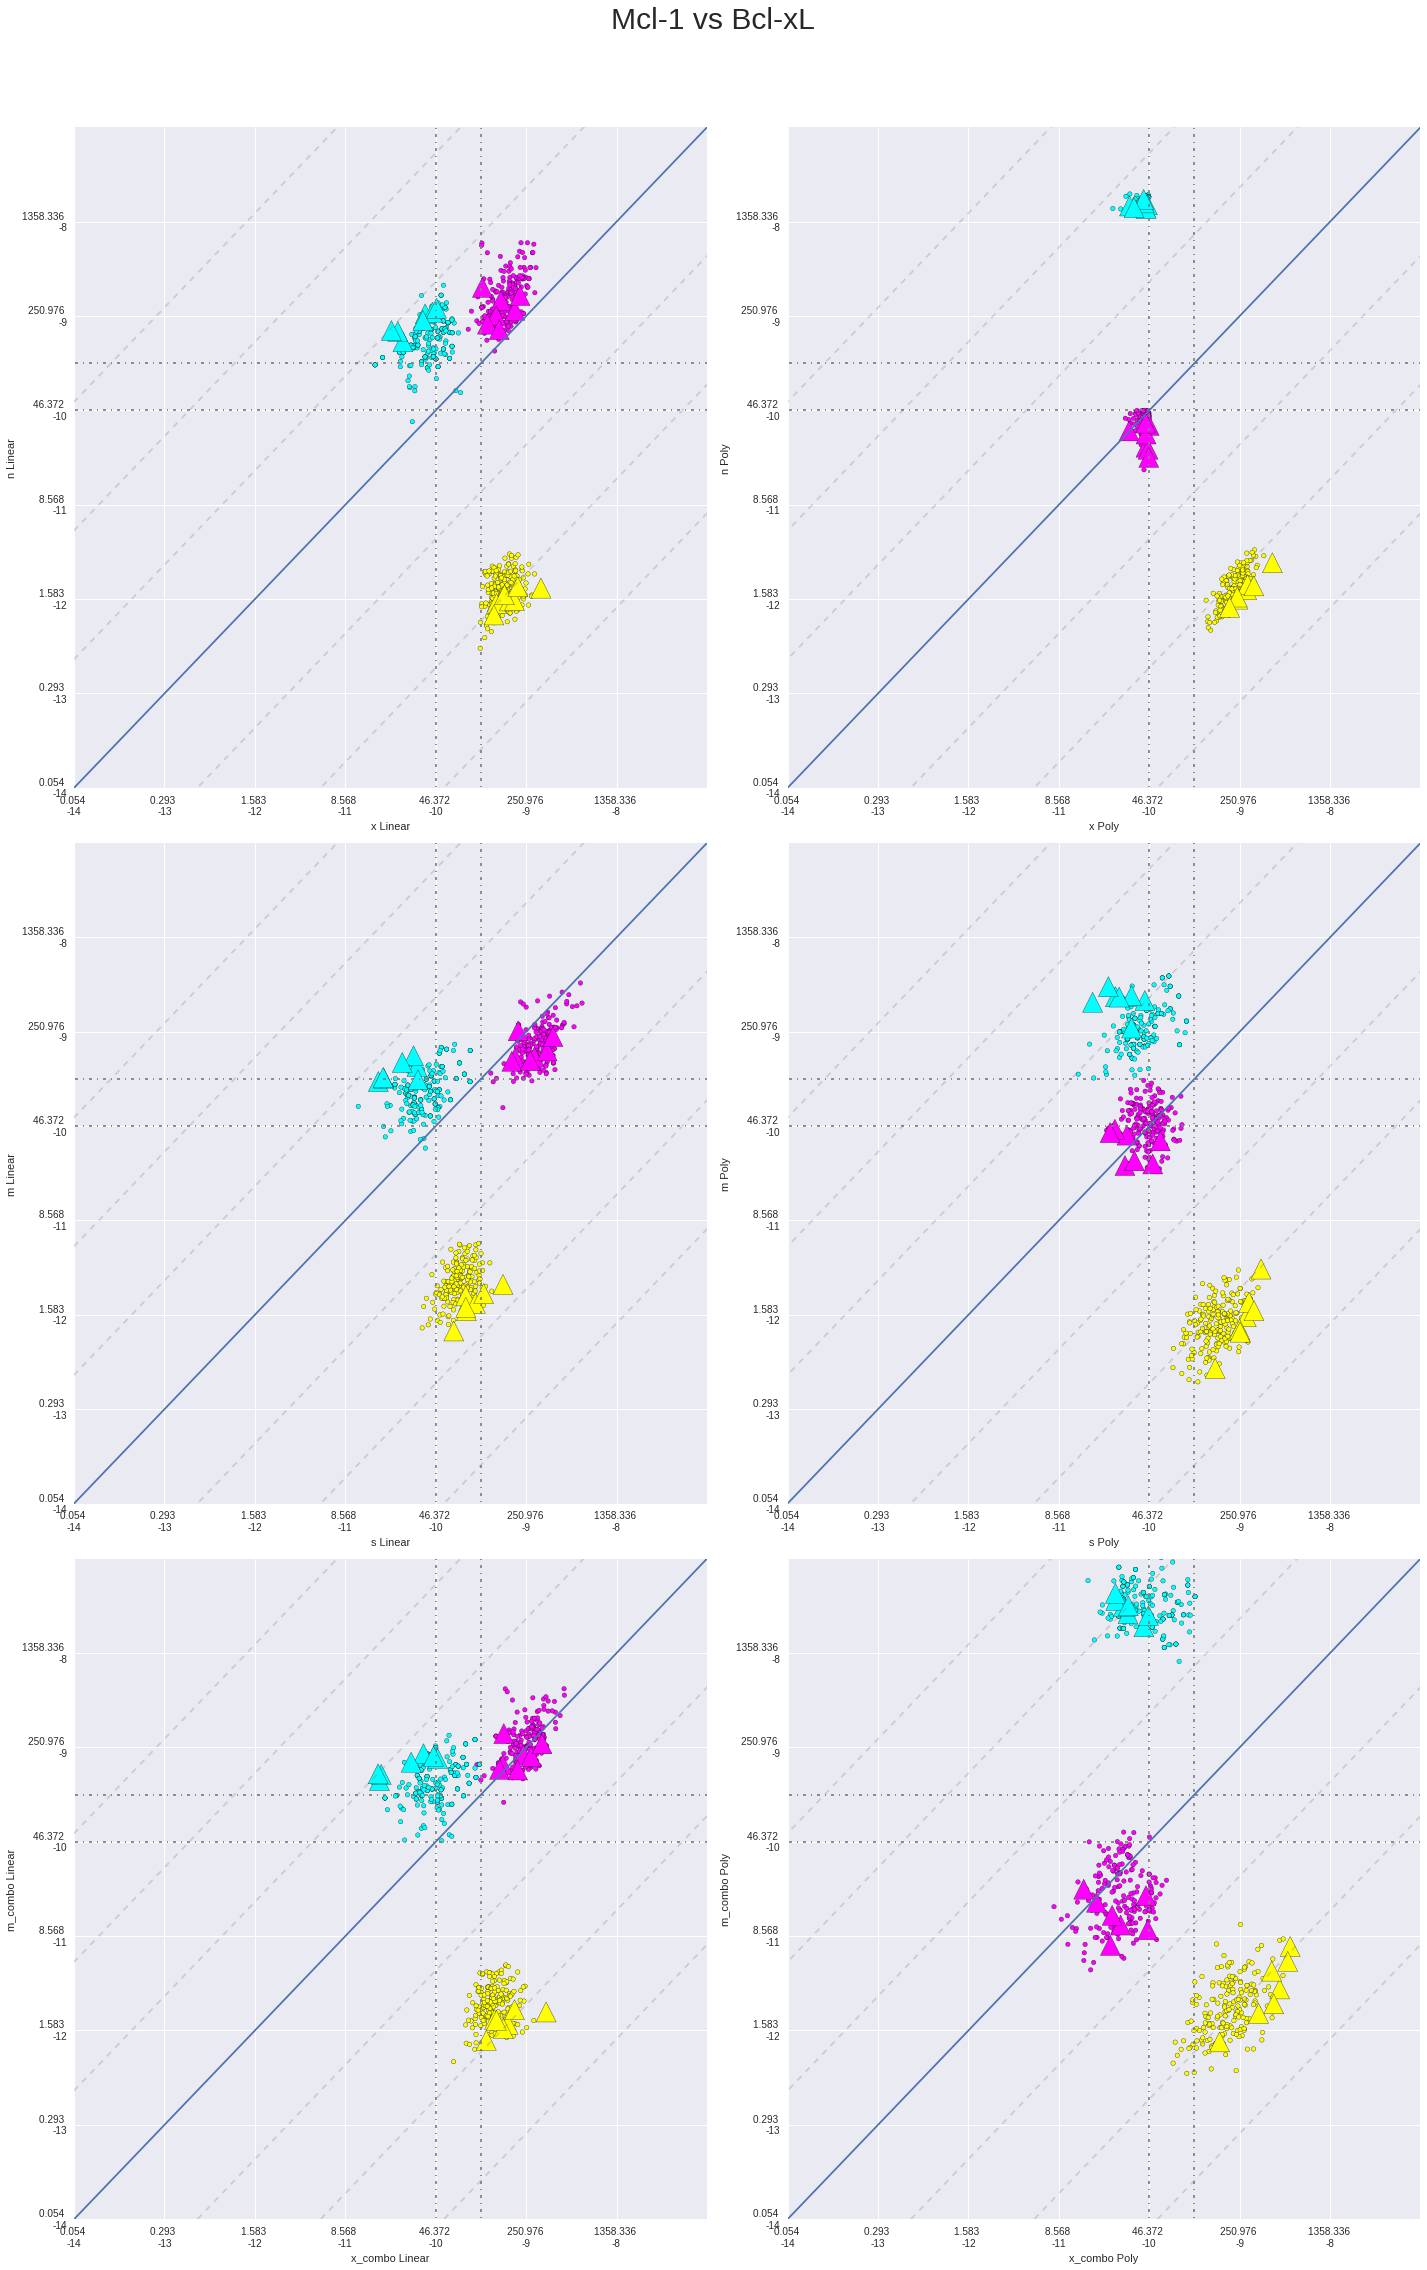

In [28]:

plotGrid('x','n','s','m','x_combo','m_combo',"Mcl-1 vs Bcl-xL")

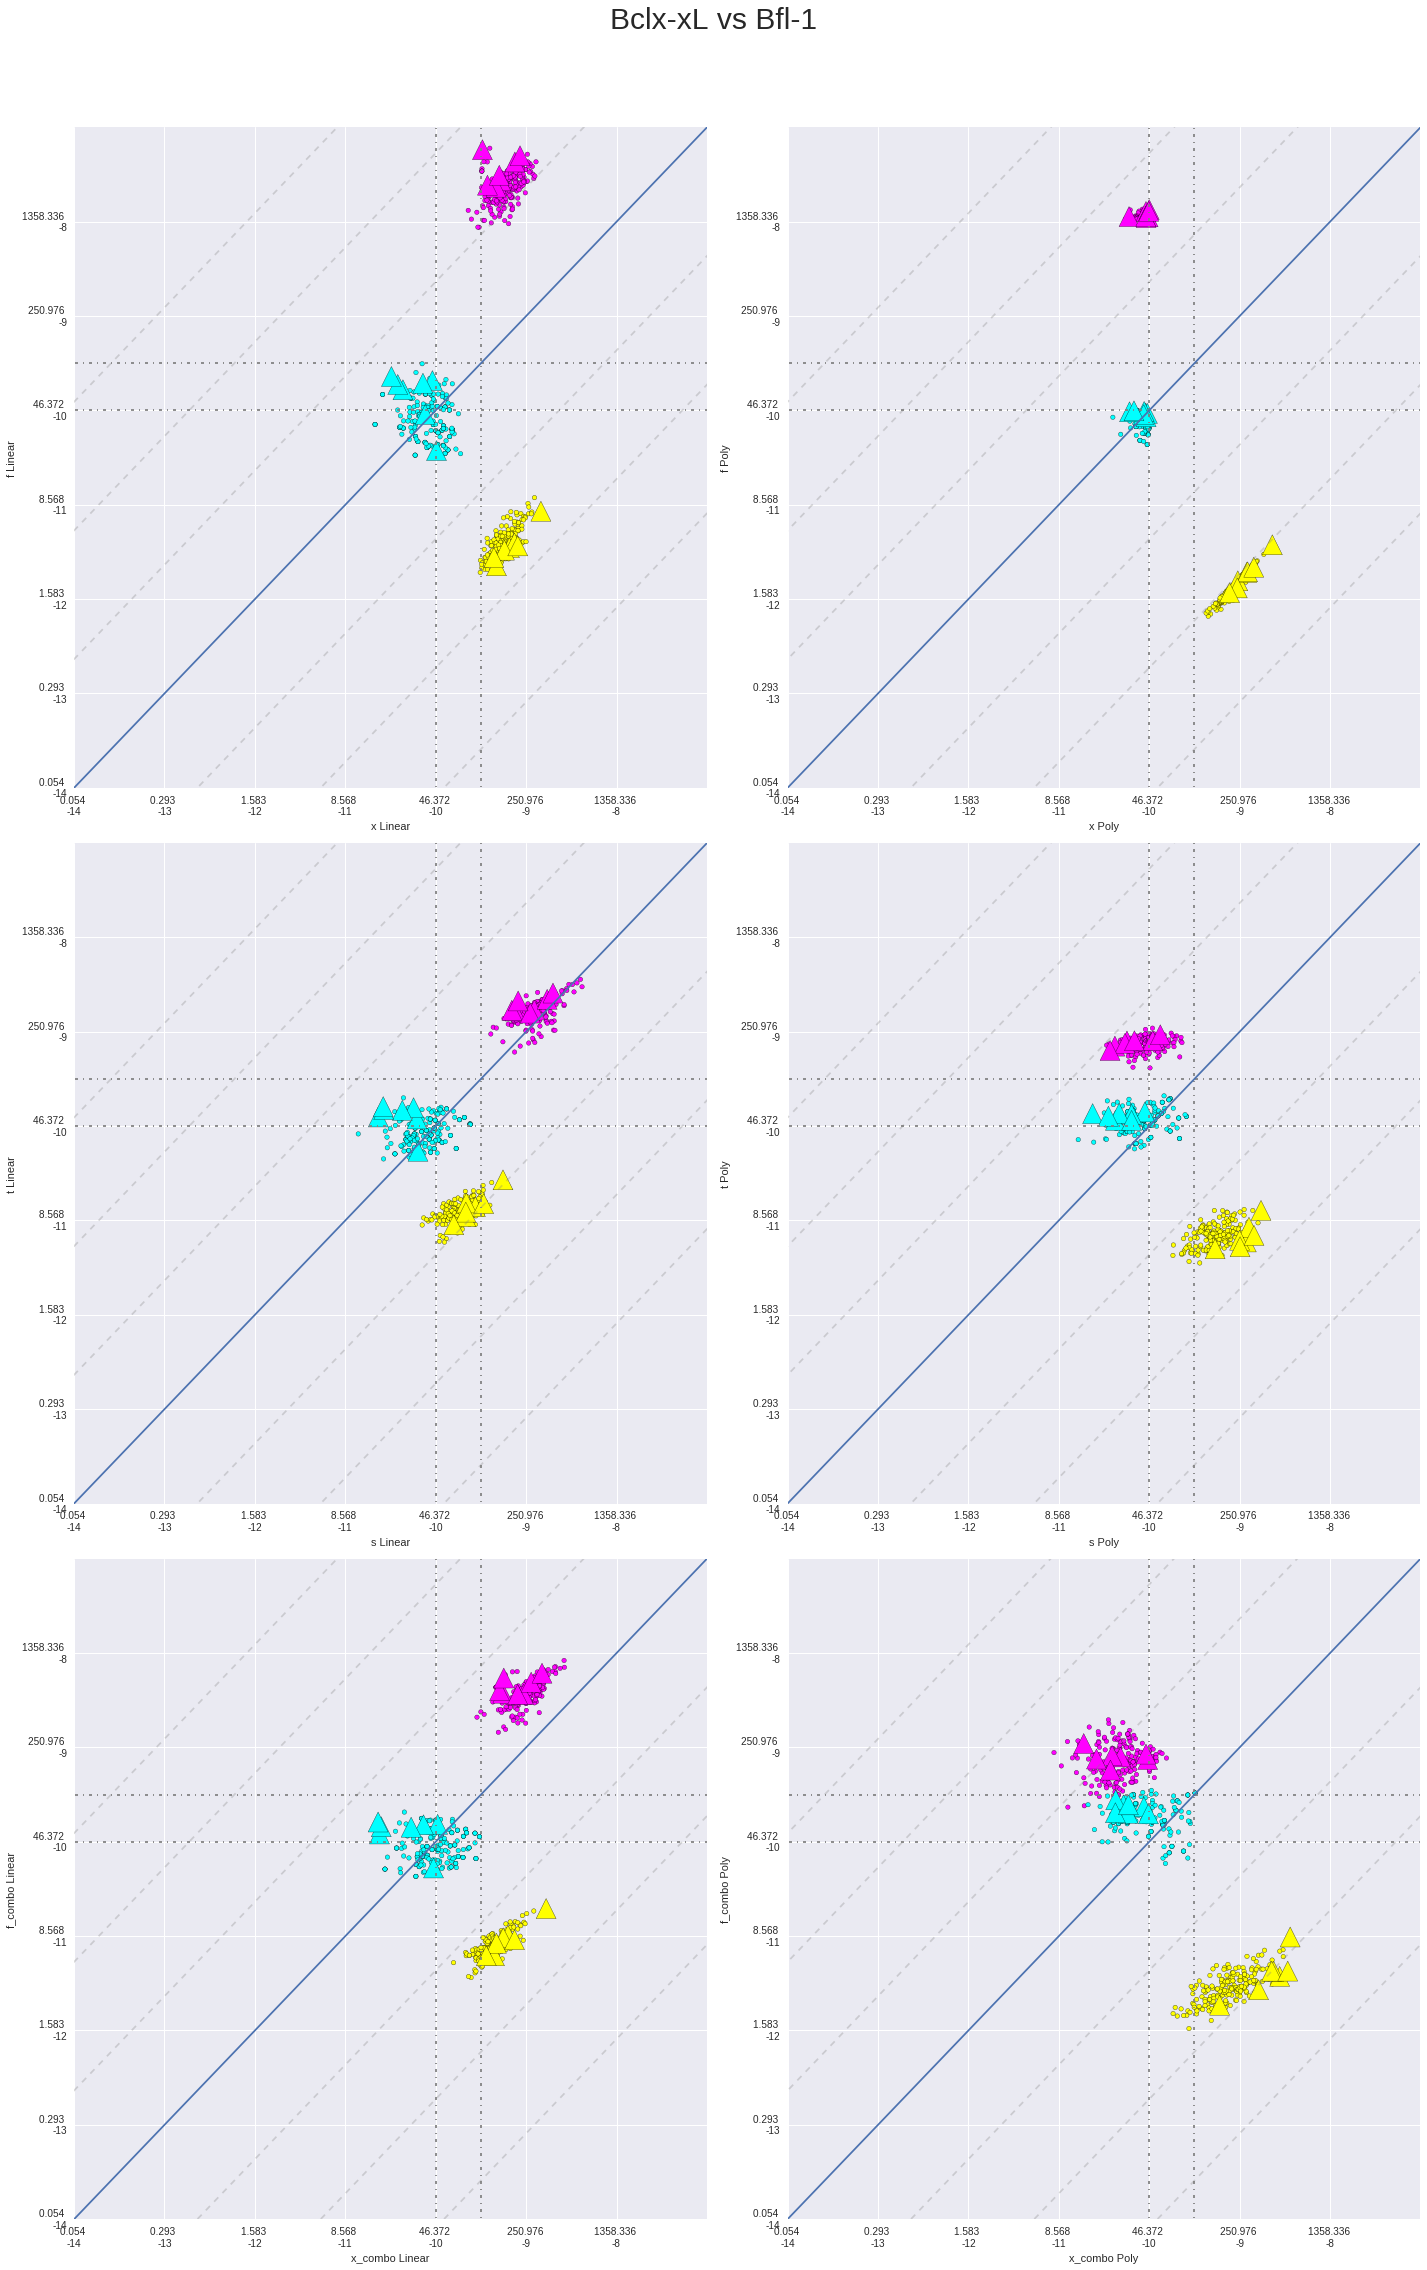

In [29]:
plotGrid('x','f','s','t','x_combo','f_combo',"Bclx-xL vs Bfl-1")

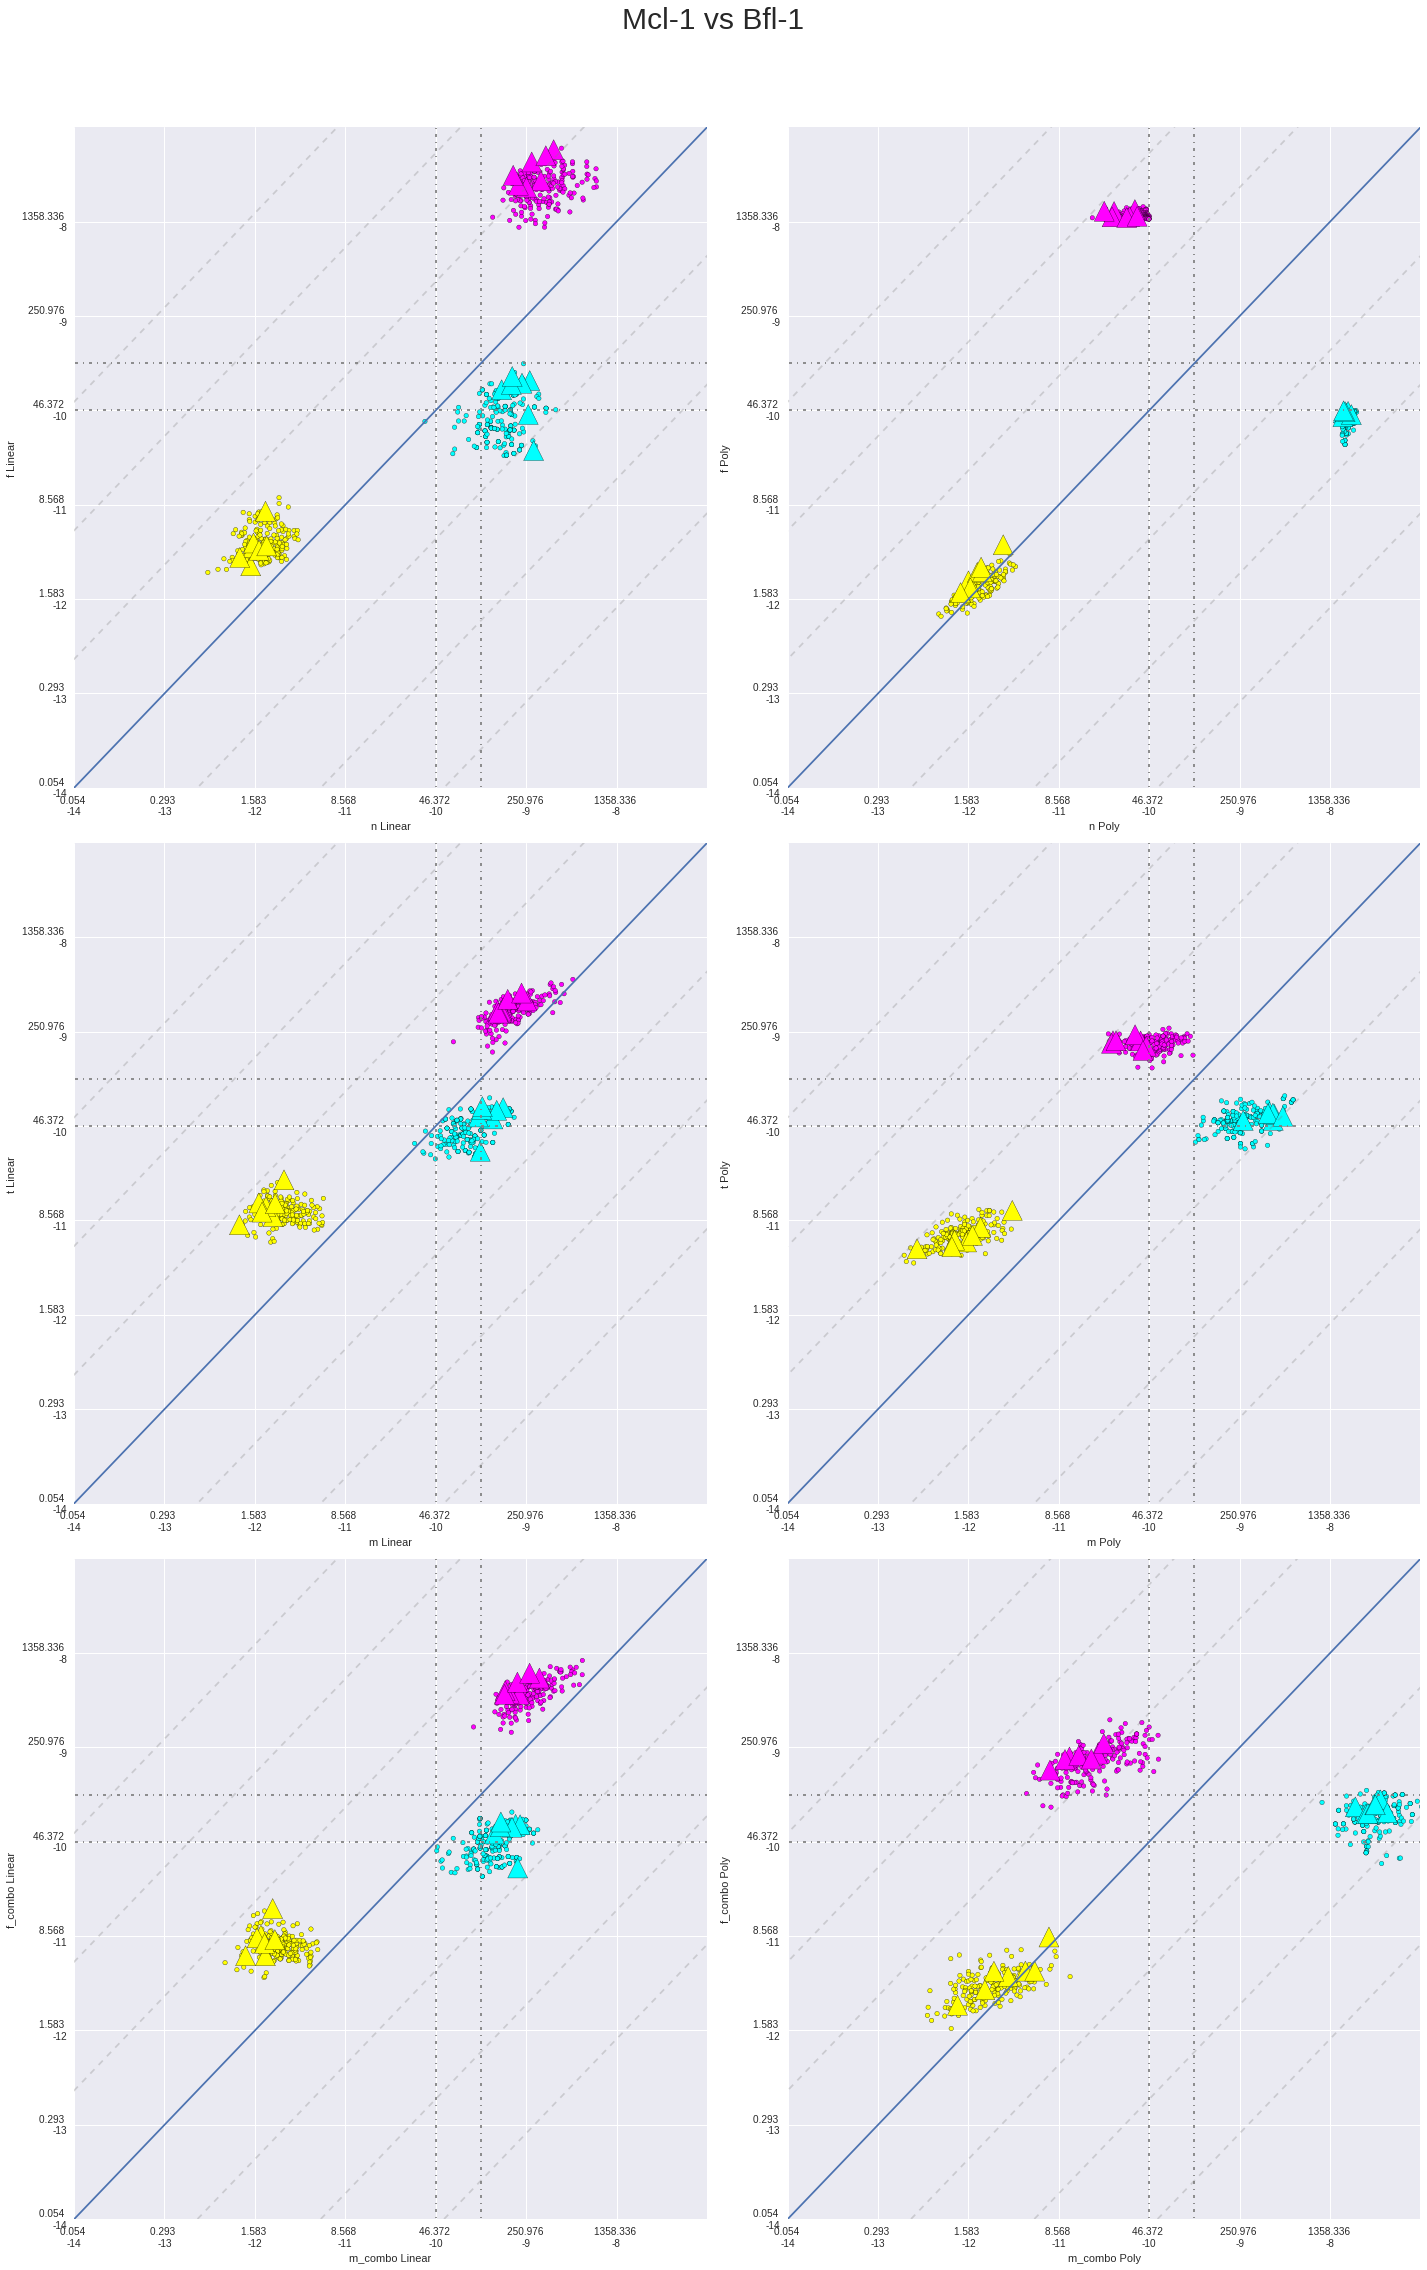

In [30]:
plotGrid('n','f','m','t','m_combo','f_combo',"Mcl-1 vs Bfl-1")


In [31]:
# %load ../PyScripts/makeLogoFromList.py
#SVM_Ranking_29
from weblogolib import *
from IPython.display import Image


def makeLogoFromList(sequences):
    myFile = open("/tmp/seqlogo",'w')
    count = 0
    for each in sequences:
        if("*" not in each and "X" not in each):
            myFile.write(each+"\n")
            #myFile.write("\n")
        count+=1
        #if (count>10000):
        #    break
    myFile.close()
    
    myFile=open("/tmp/seqlogo",'r')
    seqs = read_seq_data(myFile)
    data = LogoData.from_seqs(seqs)
    options = LogoOptions()
    options.fineprint=""
    options.resolution=300
    options.fontsize=8
    options.unit_name="bits"
    myFormat = LogoFormat(data, options)
    return png_formatter(data,myFormat)

temp = makeLogoFromList(['AATCGA'])
myFile=open("/tmp/seqlogo",'r')
seqs = read_seq_data(myFile)   
data = LogoData.from_seqs(seqs)


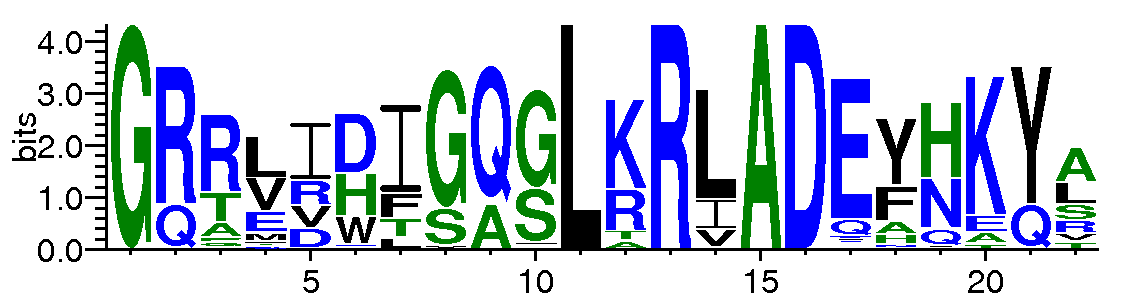

In [32]:
Image(makeLogoFromList(cleanPrediction[cleanPrediction.source.str.contains("xf-n_poly")].seq))

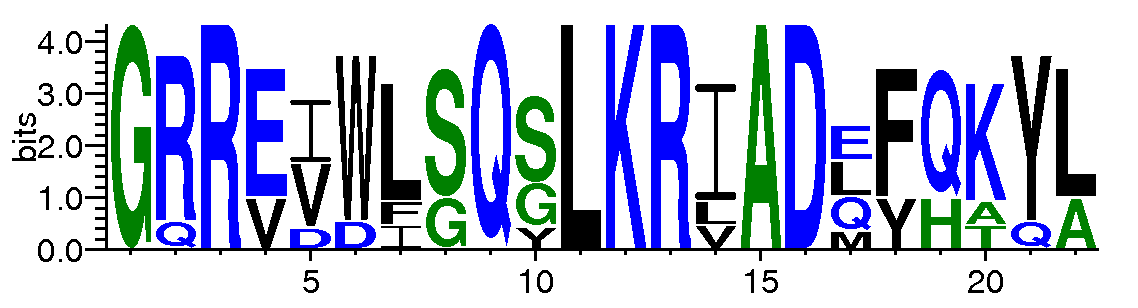

In [33]:
Image(makeLogoFromList(topXF.seq))

In [34]:
myMatrix = np.array([encodeWithDummyVariables(x) for x in topXF.seq])
np.triu(myMatrix.dot(myMatrix.T),1).astype(int)

array([[ 0,  8,  8,  8, 15,  8,  8],
       [ 0,  0, 18, 19, 12, 20, 21],
       [ 0,  0,  0, 21, 12, 19, 19],
       [ 0,  0,  0,  0, 13, 20, 20],
       [ 0,  0,  0,  0,  0, 12, 12],
       [ 0,  0,  0,  0,  0,  0, 21],
       [ 0,  0,  0,  0,  0,  0,  0]])

In [35]:
topXF.seq

540    GQRVDDFGQGLKRVADEYHAQA
469    GRREIWLSQYLKRIADLFQKYL
557    GRREVWLSQSLKRIADQFQTYL
448    GRREVWLSQSLKRIADQFQKYL
425    GRRVVWIGQGLKRLADEYHKYA
489    GRREIWLSQSLKRIADMFQKYL
525    GRREIWLSQSLKRIADLFQKYL
Name: seq, dtype: object

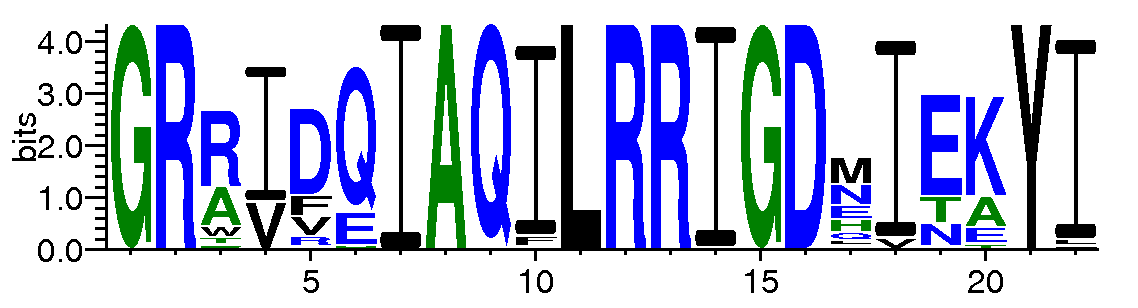

In [36]:
Image(makeLogoFromList(cleanPrediction[cleanPrediction.source.str.contains("fn-x_poly")].seq))

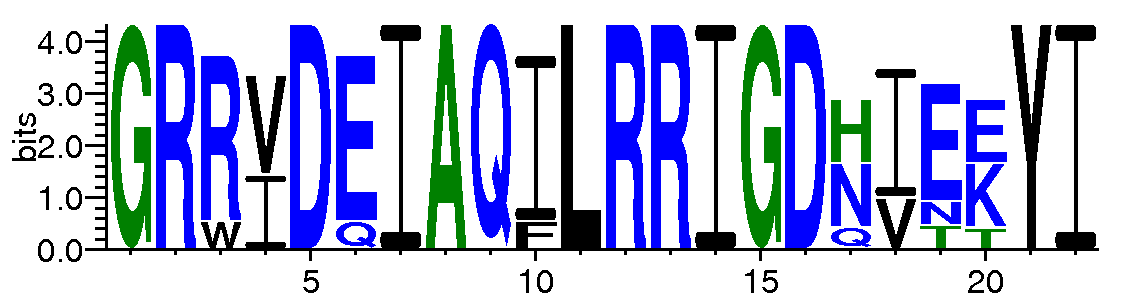

In [37]:
Image(makeLogoFromList(topMF.seq))

In [38]:
myMatrix = np.array([encodeWithDummyVariables(x) for x in topMF.seq])
np.triu(myMatrix.dot(myMatrix.T),1).astype(int)

array([[ 0, 18, 18, 20, 19, 16, 21],
       [ 0,  0, 18, 17, 21, 18, 18],
       [ 0,  0,  0, 19, 17, 14, 19],
       [ 0,  0,  0,  0, 18, 15, 21],
       [ 0,  0,  0,  0,  0, 19, 19],
       [ 0,  0,  0,  0,  0,  0, 16],
       [ 0,  0,  0,  0,  0,  0,  0]])

In [39]:
topMF.seq

144    GRRVDEIAQILRRIGDQIEEYI
113    GRRIDEIAQILRRIGDHVEKYI
142    GRRVDEIAQILRRIGDNVTTYI
104    GRRVDEIAQILRRIGDNINEYI
15     GRRIDEIAQILRRIGDHIEKYI
52     GRWIDQIAQFLRRIGDHIEKYI
57     GRRVDEIAQILRRIGDNIEEYI
Name: seq, dtype: object

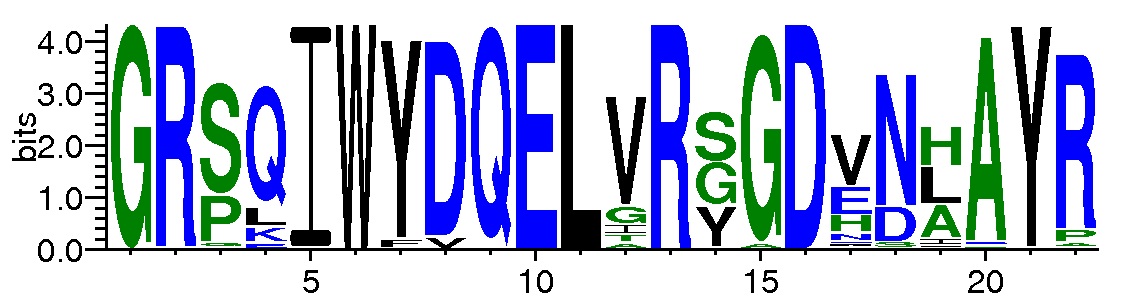

In [40]:
Image(makeLogoFromList(cleanPrediction[cleanPrediction.source.str.contains("nx-f_poly")].seq))

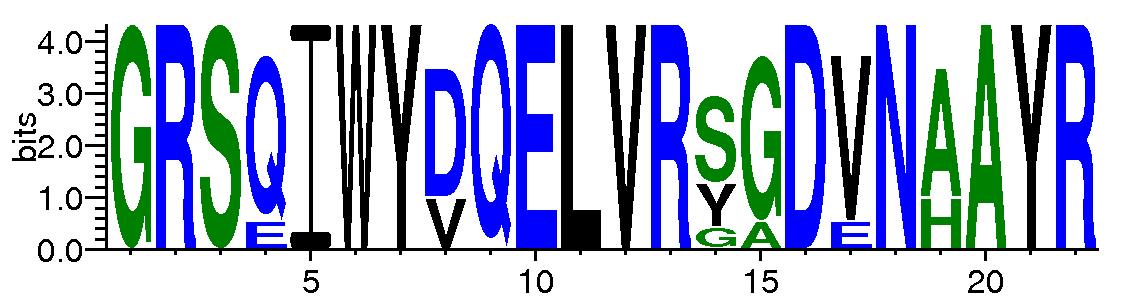

In [41]:
Image(makeLogoFromList(topXM.seq))

In [42]:
myMatrix = np.array([encodeWithDummyVariables(x) for x in topXM.seq])
np.triu(myMatrix.dot(myMatrix.T),1).astype(int)

array([[ 0, 19, 18, 20, 20, 19, 21],
       [ 0,  0, 21, 19, 19, 18, 20],
       [ 0,  0,  0, 19, 18, 18, 19],
       [ 0,  0,  0,  0, 20, 21, 21],
       [ 0,  0,  0,  0,  0, 19, 21],
       [ 0,  0,  0,  0,  0,  0, 20],
       [ 0,  0,  0,  0,  0,  0,  0]])

In [43]:
topXM.seq

223    GRSQIWYDQELVRSGDENAAYR
300    GRSQIWYVQELVRSGDVNHAYR
210    GRSQIWYVQELVRGGDVNHAYR
289    GRSQIWYDQELVRYGDVNAAYR
322    GRSEIWYDQELVRSGDVNAAYR
282    GRSQIWYDQELVRYADVNAAYR
220    GRSQIWYDQELVRSGDVNAAYR
Name: seq, dtype: object

(-13, -7)

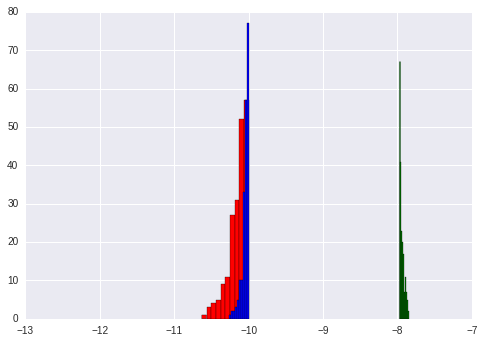

In [48]:
figure()
hist(plotSubsetData[plotSubsetData.source=='nx-f_poly'].f_poly,color='green')

hist(plotSubsetData[plotSubsetData.source=='nx-f_poly'].n_poly,color='red')

hist(plotSubsetData[plotSubsetData.source=='nx-f_poly'].x_poly,color='blue')
xlim(-13,-7)

(-13, -7)

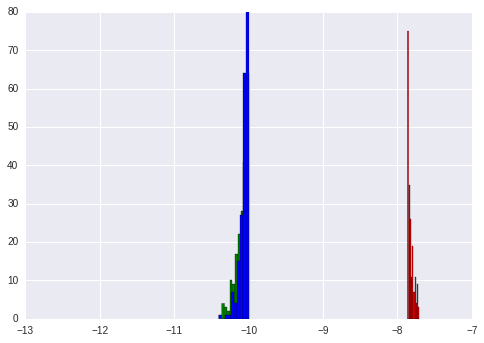

In [49]:
figure()
hist(plotSubsetData[plotSubsetData.source=='xf-n_poly'].f_poly,color='green')

hist(plotSubsetData[plotSubsetData.source=='xf-n_poly'].n_poly,color='red')

hist(plotSubsetData[plotSubsetData.source=='xf-n_poly'].x_poly,color='blue')
xlim(-13,-7)


(-13, -7)

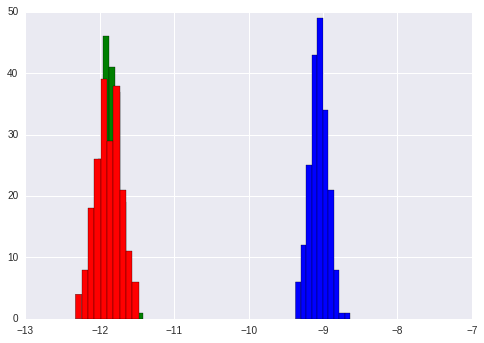

In [50]:
figure()
hist(plotSubsetData[plotSubsetData.source=='fn-x_poly'].f_poly,color='green')

hist(plotSubsetData[plotSubsetData.source=='fn-x_poly'].n_poly,color='red')

hist(plotSubsetData[plotSubsetData.source=='fn-x_poly'].x_poly,color='blue')
xlim(-13,-7)


In [87]:
topDesigns.to_pickle("/home/vxue/data/sort_specificity/design_y/top21.pickle")